In [84]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random

In [85]:
antiviral=pd.read_csv("Antiviral/antiviral_nomod_canon.csv")
hlp=pd.read_csv("HLP/HLP.csv")
peplife=pd.read_csv("PEPLIFE/PEP_LIFE_nomod_canon.csv")
peptherdia=pd.read_csv("PepTherDia/PepTherDia_nomod_canon.csv")
plifepred=pd.read_csv("Plifepred/plifepred_nomod_canon.csv")
serum=pd.read_csv("Serum/serum_nomod_canon.csv")

In [86]:
dataframes = {
    "Antiviral": antiviral,
    "HLP": hlp,
    "PepLife": peplife,
    "PlifePred": plifepred,
    "Serum": serum
}

In [87]:
dict_check = { "sequence": [], "Antiviral": [], "HLP": [], "PepLife": [], "PlifePred": [], "Serum": [] }

In [88]:
for key in dataframes:
    for j in range(len(dataframes[key])):
        if dataframes[key]['sequence'][j] not in dict_check['sequence']:
            dict_check['sequence'].append(dataframes[key]['sequence'][j])
            dict_check[key].append(0)
            for k in dict_check.keys():
                if k != 'sequence':
                    dict_check[k].append(0)
        elif dataframes[key]['sequence'][j] in dict_check['sequence']:
            index = dict_check['sequence'].index(dataframes[key]['sequence'][j])
            dict_check[key][index] += 1

In [89]:
print (dict_check)

{'sequence': ['AAAMSQVTN', 'AACEVAKNLNESLIDLQELGKYEQYIKW', 'AAGAVVNDL', 'AAHLIDALYAEFLGGRVLTT', 'AAHLIDALYAEFLGGRVLTTPVVHRALFYASAVLRQPFLAGVPSA', 'AAKAWKKAKAWKKAKWWKKAA', 'AALGDTAWDFGSIGGVFNSIGRAVHQVFGGAFRTL', 'AAQRRGRIGRNPSQVGD', 'AAQRRGRVGRNPNQVGD', 'AAWWAGIKQEF', 'AAYFLLKLAGRW', 'ACAPWGNTWCGGK', 'ACAWAGIKQEF', 'ACELKWESEFWRWTEQLA', 'ACFAWGNTWCGGK', 'ACFPAGNTWCGGK', 'ACFPWANTWCGGK', 'ACFPWGATWCGGK', 'ACFPWGKEYCGGK', 'ACFPWGNAWCGGK', 'ACFPWGNQWCGGK', 'ACFPWGNTACGGK', 'ACFPWGNTWCGGK', 'ACWAAGIKQEF', 'ACWWAAIKQEF', 'ACWWAGAKQEF', 'ACWWAGIAQEF', 'ACWWAGIKAEF', 'ACWWAGIKQAF', 'ACWWAGIKQEA', 'ADLEVVAATFVLVA', 'ADLEVVAATHVLVA', 'ADLEVVAATYAAAA', 'ADLEVVAATYKKKK', 'ADLEVVAATYV', 'ADLEVVAATYVDDA', 'ADLEVVAATYVDDD', 'ADLEVVAATYVDVA', 'ADLEVVAATYVDVD', 'ADLEVVAATYVKKK', 'ADLEVVAATYVLDA', 'ADLEVVAATYVLDD', 'ADLEVVAATYVLVA', 'ADLEVVAATYVLVD', 'ADVILMCFSIDSPDSLENI', 'AEAASQVTNTATIM', 'AEAIPMSIPPEVKFNKPFVF', 'AEAMAQVTN', 'AEAMSQVANTATIM', 'AEAMSQVTN', 'AEAMSQVTNTATIM', 'AEASQVTNTATIM', 'AECVVSCSMSYT

In [90]:
long=len(dict_check['sequence'])
for clave in dict_check:
    dict_check[clave] += [0] * (long - len(dict_check[clave]))
df_check = pd.DataFrame(dict_check)

ValueError: All arrays must be of the same length

In [ ]:
df_check

,sequence,Antiviral,HLP,PepLife,PlifePred,Serum
0,AAAMSQVTN,1,0,0,0,0
1,AACEVAKNLNESLIDLQELGKYEQYIKW,1,0,0,0,0
2,AAGAVVNDL,1,0,0,0,0
3,AAHLIDALYAEFLGGRVLTT,1,0,0,0,0
4,AAHLIDALYAEFLGGRVLTTPVVHRALFYASAVLRQPFLAGVPSA,1,0,0,0,0
...,...,...,...,...,...,...
1793,RWCVYACVRGVCYRRCW,0,0,0,0,1
1794,MCMPCFTTDHQMARKCDDCCGGKGRGKCYGPQCLCR,0,0,0,0,1
1795,KRFKKFFKKVKKSVKKRLKKIFKKPMVIGVTIPF,0,0,0,0,1
1796,KRFKKFFKKVKKSV,0,0,0,0,1


In [ ]:
correlations1 = []
correlations1_5 = []

for i in range(1000):
    ran1 = random.choice(list(dataframes.keys()))
    ran2 = random.choice(list(dataframes.keys()))
    m1=dataframes[ran1]['half_life_seconds'].sample(100, replace=True)
    m2=dataframes[ran2]['half_life_seconds'].sample(100, replace=True)
    m1, m2 = m1.reset_index(drop=True), m2.reset_index(drop=True)
    corr = m1.corr(m2)
    corr2= m2.corr(m2, method='spearman')
    correlations1.append(corr)
    correlations1_5.append(corr2)

In [ ]:
correlations2 = []
correlations2_5 = []
for i in range(1000):
    serie1 = []
    serie2 = []
    for j in range(1000):
        ran1 = random.choice(list(dataframes.keys()))
        ran2 = random.choice(list(dataframes.keys()))
        m1=dataframes[ran1]['half_life_seconds'].sample(1, replace=True)
        m2=dataframes[ran2]['half_life_seconds'].sample(1, replace=True)
        m1, m2 = m1.reset_index(drop=True), m2.reset_index(drop=True)
        serie1.append(m1)
        serie2.append(m2)
    serie1 = pd.Series(serie1)
    serie2 = pd.Series(serie2)
    corr = serie1.corr(serie2)
    corr2 = serie1.corr(serie2, method='spearman')
    correlations2.append(corr)
    correlations2_5.append(corr2)

/tmp/ipykernel_26664/3739432339.py:16: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  corr = serie1.corr(serie2)
/tmp/ipykernel_26664/3739432339.py:17: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  corr2 = serie1.corr(serie2, method='spearman')


KeyboardInterrupt: 

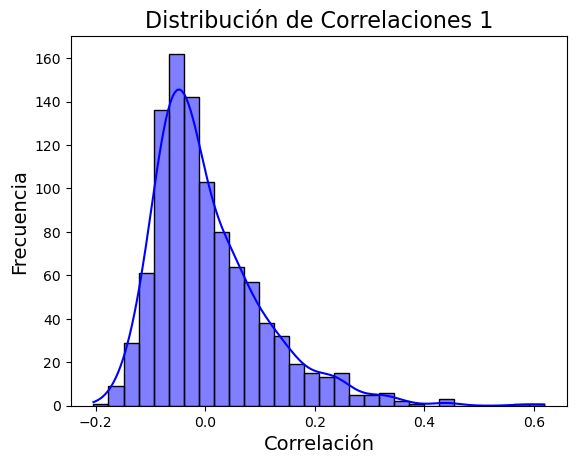

In [ ]:
sns.histplot(correlations1, kde=True, bins=30, color='blue')

# Añadir títulos y etiquetas
plt.title('Distribución de Correlaciones 1', fontsize=16)
plt.xlabel('Correlación', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)

# Mostrar el gráfico
plt.show()

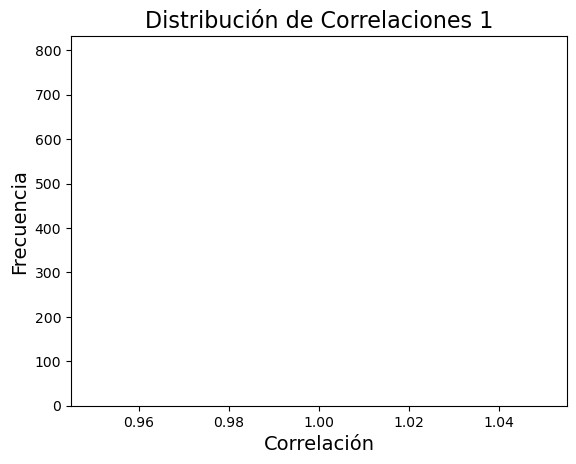

In [ ]:
sns.histplot(correlations1_5, kde=True, bins=30, color='blue')

# Añadir títulos y etiquetas
plt.title('Distribución de Correlaciones 1', fontsize=16)
plt.xlabel('Correlación', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)

# Mostrar el gráfico
plt.show()

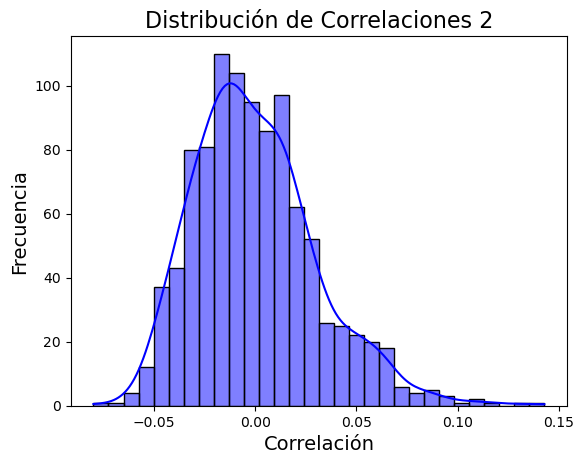

In [ ]:
sns.histplot(correlations2, kde=True, bins=30, color='blue')

# Añadir títulos y etiquetas
plt.title('Distribución de Correlaciones 2', fontsize=16)
plt.xlabel('Correlación', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)

# Mostrar el gráfico
plt.show()

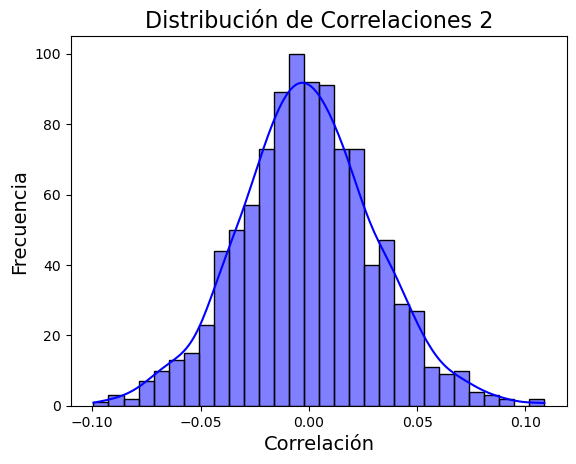

In [ ]:
sns.histplot(correlations2_5, kde=True, bins=30, color='blue')

# Añadir títulos y etiquetas
plt.title('Distribución de Correlaciones 2', fontsize=16)
plt.xlabel('Correlación', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)

# Mostrar el gráfico
plt.show()

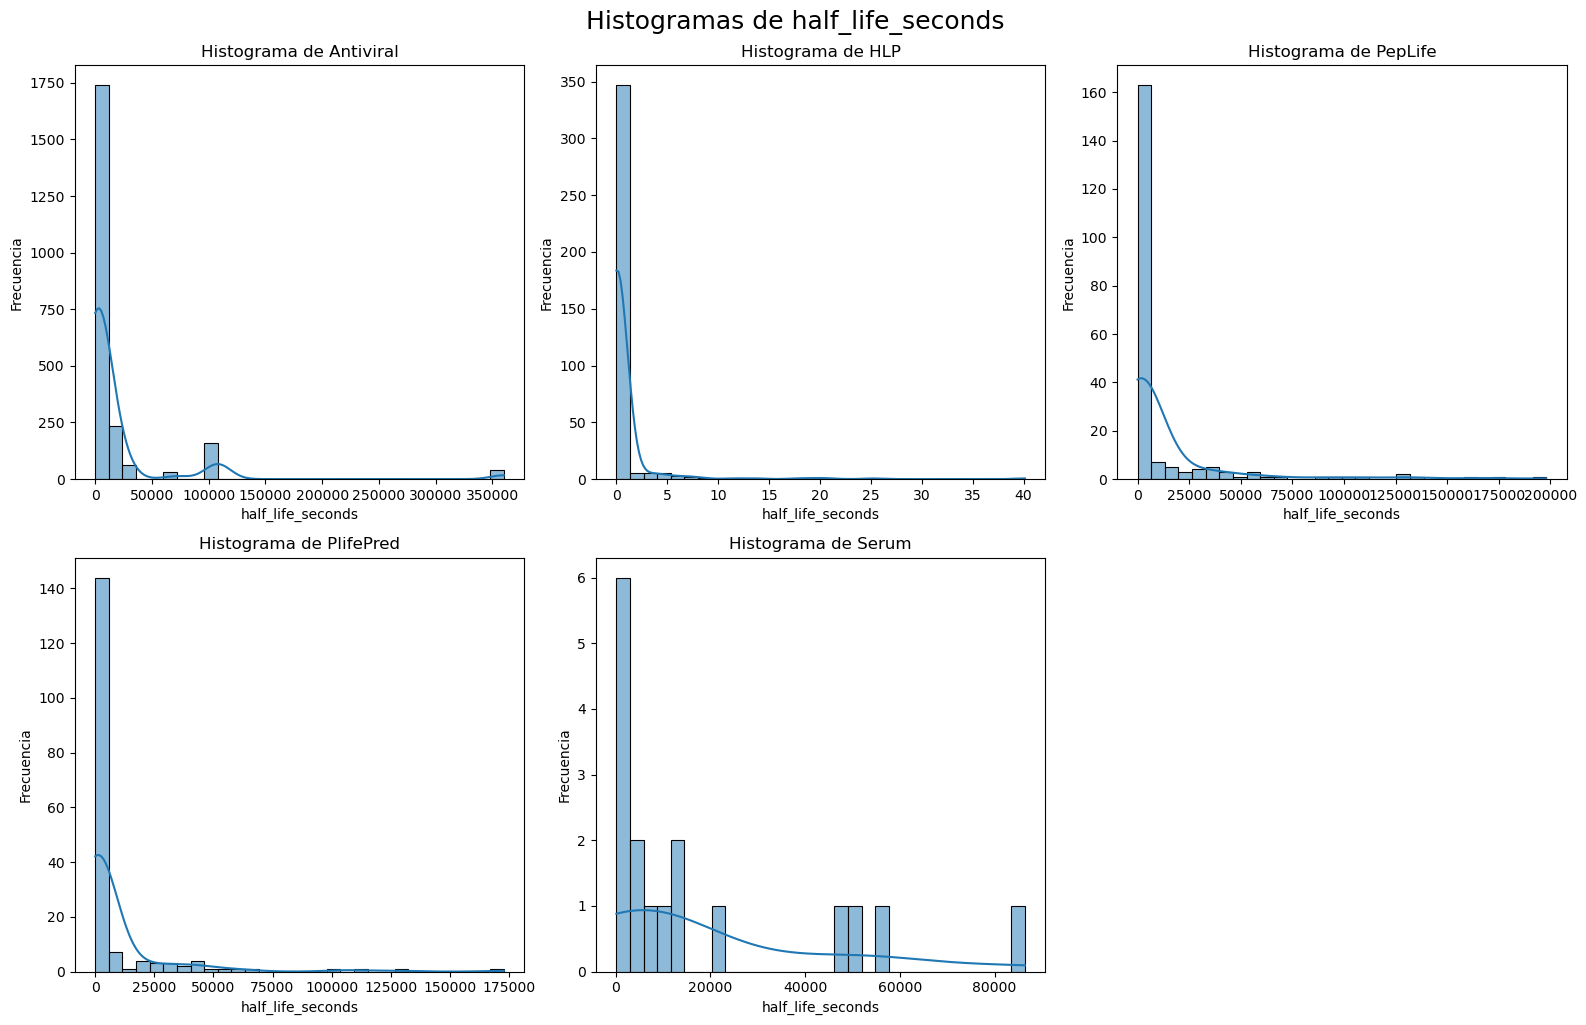

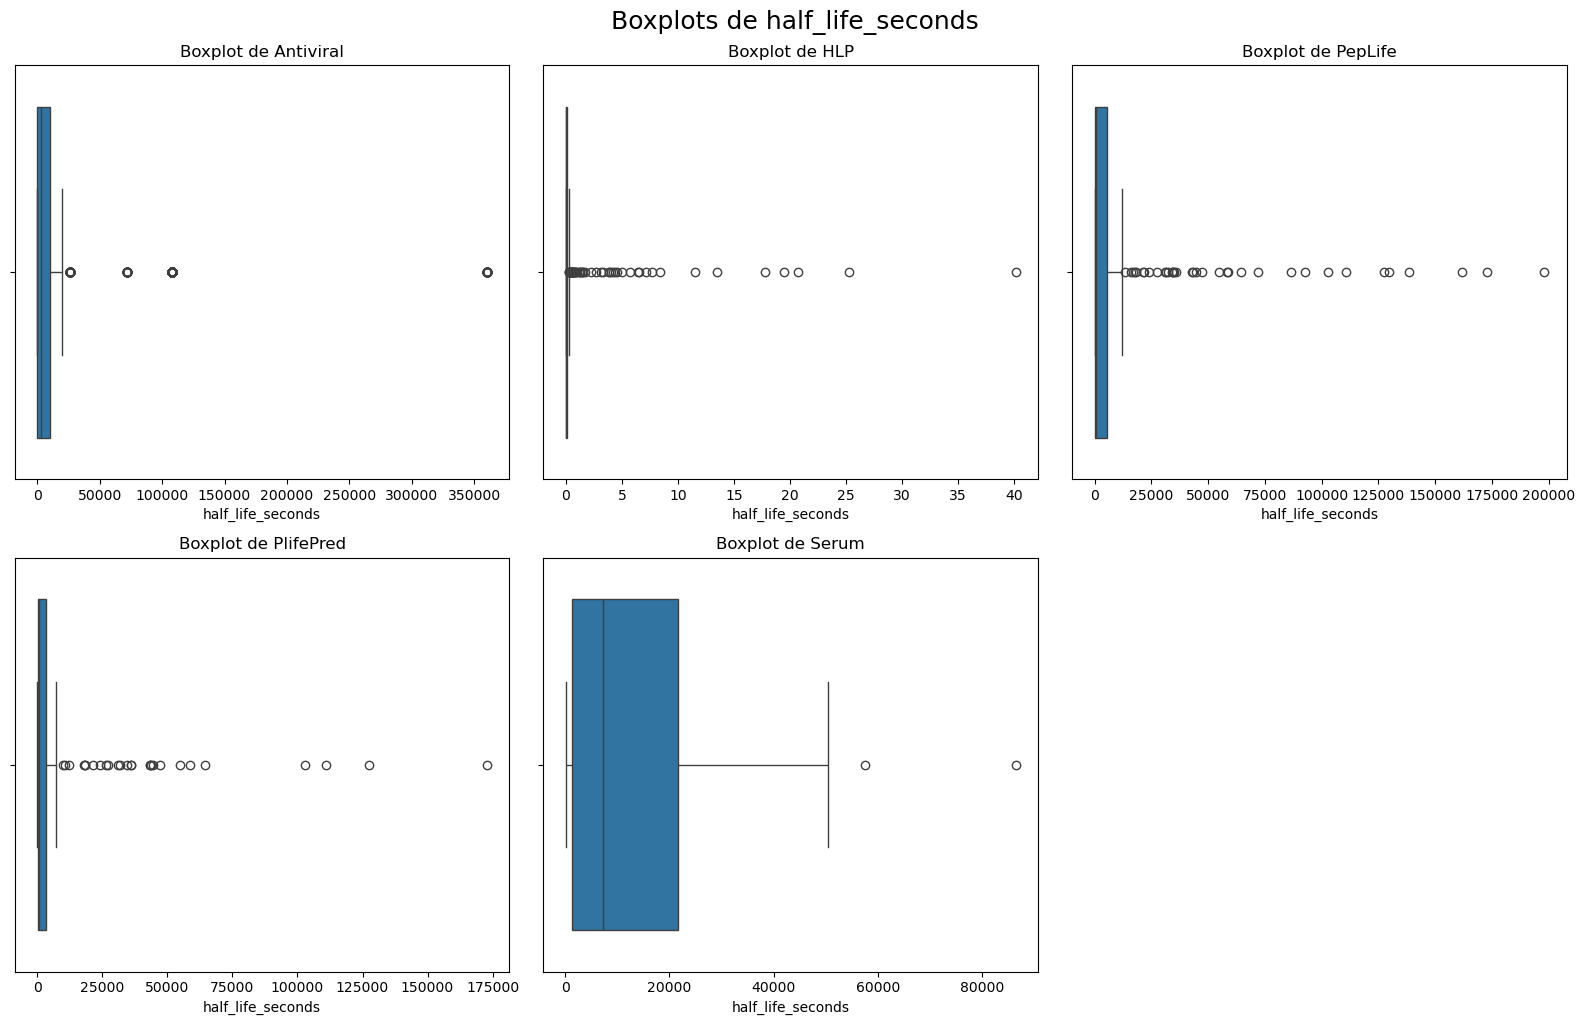

In [ ]:
# Extraer la columna `half_life_seconds` solo si existe y no está vacía
columns_to_plot = {
    name: df["half_life_seconds"] 
    for name, df in dataframes.items() 
    if "half_life_seconds" in df.columns and not df["half_life_seconds"].dropna().empty
}

# Configuración de subplots: 2 filas arriba, 3 abajo (en total 2x3 = 6 espacios)
n_cols = 3
n_rows = 2

# Crear figura para los histogramas
plt.figure(figsize=(16, 10))
for i, (name, column) in enumerate(columns_to_plot.items(), 1):
    plt.subplot(n_rows, n_cols, i)
    sns.histplot(column, kde=True, bins=30)
    plt.title(f"Histograma de {name}")
    plt.xlabel("half_life_seconds")
    plt.ylabel("Frecuencia")
plt.tight_layout()
plt.suptitle("Histogramas de half_life_seconds", fontsize=18, y=1.02)
plt.show()

# Crear figura para los boxplots
plt.figure(figsize=(16, 10))
for i, (name, column) in enumerate(columns_to_plot.items(), 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(x=column)
    plt.title(f"Boxplot de {name}")
    plt.xlabel("half_life_seconds")
plt.tight_layout()
plt.suptitle("Boxplots de half_life_seconds", fontsize=18, y=1.02)
plt.show()